In [5]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [6]:
data1=pd.read_csv("sales_train_v2.csv")

In [7]:
data2=pd.read_csv("salepridict/items.csv")
name=[]
cid=[]
item_idd=np.array(data2)
for i in data1["item_id"]:
    if i in range(len(item_idd)):
        name.append(item_idd[i][0])
        cid.append(item_idd[i][2])
item_name=pd.DataFrame(name, columns=["item_name"])
cat_no=pd.DataFrame(cid,columns=["item_cat_no"])
data=pd.concat([data1,item_name,cat_no], axis=1)


In [8]:
data3=pd.read_csv("salepridict/item_categories.csv")
data3=np.array(data3)
cat=[]
for i in data["item_cat_no"]:
    if i in range(len(data3)):
        cat.append(data3[i][0])
catname=pd.DataFrame(cat, columns=["item_category_name"])
data=pd.concat([data,catname],axis=1)

In [9]:
data4=pd.read_csv("salepridict/shops.csv")
d4=np.array(data4)
c=[]
for i in data["shop_id"]:
    if i in range(len(d4)):
        c.append(d4[i][0])
shop_name=pd.DataFrame(c, columns=["shop_name"])
data=pd.concat([data,shop_name],axis=1)

In [10]:
data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_cat_no,item_category_name,shop_name
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,58,Музыка - Винил,"Москва ТРК ""Атриум"""
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
5,10.01.2013,0,25,2564,349.00,1.0,DEEP PURPLE Perihelion: Live In Concert DVD (К...,59,Музыка - Музыкальное видео,"Москва ТРК ""Атриум"""
6,02.01.2013,0,25,2565,549.00,1.0,DEEP PURPLE Stormbringer (фирм.),56,Музыка - CD фирменного производства,"Москва ТРК ""Атриум"""
7,04.01.2013,0,25,2572,239.00,1.0,DEFTONES Koi No Yokan,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
8,11.01.2013,0,25,2572,299.00,1.0,DEFTONES Koi No Yokan,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""
9,03.01.2013,0,25,2573,299.00,3.0,DEL REY LANA Born To Die,55,Музыка - CD локального производства,"Москва ТРК ""Атриум"""


In [11]:
data = data.drop(['shop_name', 'item_name', 'item_category_name'],axis=1)

In [12]:
data.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_cat_no
0,02.01.2013,0,59,22154,999.00,1.0,37
1,03.01.2013,0,25,2552,899.00,1.0,58
2,05.01.2013,0,25,2552,899.00,-1.0,58
3,06.01.2013,0,25,2554,1709.05,1.0,58
4,15.01.2013,0,25,2555,1099.00,1.0,56
5,10.01.2013,0,25,2564,349.00,1.0,59
6,02.01.2013,0,25,2565,549.00,1.0,56
7,04.01.2013,0,25,2572,239.00,1.0,55
8,11.01.2013,0,25,2572,299.00,1.0,55
9,03.01.2013,0,25,2573,299.00,3.0,55


In [13]:
from datetime import datetime

In [14]:
data['date'] = [datetime.strptime(i, "%d.%m.%Y") for i in data['date']]

In [15]:
data['day'] = [i.day for i in data['date']]
data['month'] = [i.month for i in data['date']]
data['year'] = [i.year for i in data['date']]

In [16]:
data.head(10)

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_cat_no,day,month,year
0,2013-01-02,0,59,22154,999.00,1.0,37,2,1,2013
1,2013-01-03,0,25,2552,899.00,1.0,58,3,1,2013
2,2013-01-05,0,25,2552,899.00,-1.0,58,5,1,2013
3,2013-01-06,0,25,2554,1709.05,1.0,58,6,1,2013
4,2013-01-15,0,25,2555,1099.00,1.0,56,15,1,2013
5,2013-01-10,0,25,2564,349.00,1.0,59,10,1,2013
6,2013-01-02,0,25,2565,549.00,1.0,56,2,1,2013
7,2013-01-04,0,25,2572,239.00,1.0,55,4,1,2013
8,2013-01-11,0,25,2572,299.00,1.0,55,11,1,2013
9,2013-01-03,0,25,2573,299.00,3.0,55,3,1,2013


In [17]:
data = data.drop(['date'],axis=1)

In [18]:
data = data.drop(['date_block_num'],axis=1)

In [19]:
data = data.drop(['day'],axis=1)

In [20]:
data = data.drop(['item_cat_no'],axis=1)

In [21]:
data2013 = data[data.year==2013]
data2014 = data[data.year==2014]
data2015 = data[data.year==2015]

In [22]:
dataNovember = data[data.month==11]

In [23]:
dataNovember.head()

,shop_id,item_id,item_price,item_cnt_day,month,year
1027580,43,4420,299.0,1.0,11,2013
1027581,28,10033,199.0,1.0,11,2013
1027582,28,10051,149.0,1.0,11,2013
1027583,28,10051,149.0,1.0,11,2013
1027584,28,10051,149.0,1.0,11,2013


In [24]:
mydict = {}

for i, row in data2013.iterrows():
    mn = int(row['month'])
    itemid = int(row['item_id'])
    if mn not in mydict.keys():
        mydict[mn] = {}

    if itemid not in mydict[mn].keys():
        mydict[mn][itemid] = [row['shop_id'], row['item_price'],0]

    mydict[mn][itemid][-1] += row['item_cnt_day']


In [25]:
mydict

{1: {22154: [59.0, 999.0, 18.0],
  2552: [25.0, 899.0, 0.0],
  2554: [25.0, 1709.05, 1.0],
  2555: [25.0, 1099.0, 2.0],
  2564: [25.0, 349.0, 5.0],
  2565: [25.0, 549.0, 2.0],
  2572: [25.0, 239.0, 12.0],
  2573: [25.0, 299.0, 16.0],
  2574: [25.0, 399.0, 119.0],
  2593: [25.0, 279.0, 5.0],
  2604: [25.0, 299.0, 10.0],
  2607: [25.0, 279.0, 29.0],
  2609: [25.0, 1699.0, 4.0],
  2548: [25.0, 1708.95, 1.0],
  2611: [25.0, 299.0, 1.0],
  2546: [25.0, 299.0, 12.0],
  2515: [25.0, 1649.0, 3.0],
  2705: [25.0, 1799.0, 12.0],
  2715: [25.0, 899.0, 16.0],
  2716: [25.0, 149.0, 32.0],
  2719: [25.0, 2699.0, 13.0],
  2720: [25.0, 1699.0, 6.0],
  2473: [25.0, 899.0, 3.0],
  2480: [25.0, 58.0, 4.0],
  2731: [25.0, 599.0, 28.0],
  2746: [25.0, 299.0, 113.0],
  2748: [25.0, 1399.0, 58.0],
  2522: [25.0, 1999.0, 2.0],
  2614: [25.0, 299.0, 19.0],
  2798: [25.0, 449.0, 19.0],
  2833: [25.0, 599.0, 138.0],
  2835: [25.0, 1999.0, 45.0],
  2836: [25.0, 1999.0, 25.0],
  2844: [25.0, 899.0, 24.0],
  2845: 

In [26]:
df =[]

for mn in mydict.keys():
    for itemid in mydict[mn].keys():
        row = [mn,itemid] + mydict[mn][itemid]
        df.append(row)
        
        

In [27]:
df

[[1, 22154, 59.0, 999.0, 18.0],
 [1, 2552, 25.0, 899.0, 0.0],
 [1, 2554, 25.0, 1709.05, 1.0],
 [1, 2555, 25.0, 1099.0, 2.0],
 [1, 2564, 25.0, 349.0, 5.0],
 [1, 2565, 25.0, 549.0, 2.0],
 [1, 2572, 25.0, 239.0, 12.0],
 [1, 2573, 25.0, 299.0, 16.0],
 [1, 2574, 25.0, 399.0, 119.0],
 [1, 2593, 25.0, 279.0, 5.0],
 [1, 2604, 25.0, 299.0, 10.0],
 [1, 2607, 25.0, 279.0, 29.0],
 [1, 2609, 25.0, 1699.0, 4.0],
 [1, 2548, 25.0, 1708.95, 1.0],
 [1, 2611, 25.0, 299.0, 1.0],
 [1, 2546, 25.0, 299.0, 12.0],
 [1, 2515, 25.0, 1649.0, 3.0],
 [1, 2705, 25.0, 1799.0, 12.0],
 [1, 2715, 25.0, 899.0, 16.0],
 [1, 2716, 25.0, 149.0, 32.0],
 [1, 2719, 25.0, 2699.0, 13.0],
 [1, 2720, 25.0, 1699.0, 6.0],
 [1, 2473, 25.0, 899.0, 3.0],
 [1, 2480, 25.0, 58.0, 4.0],
 [1, 2731, 25.0, 599.0, 28.0],
 [1, 2746, 25.0, 299.0, 113.0],
 [1, 2748, 25.0, 1399.0, 58.0],
 [1, 2522, 25.0, 1999.0, 2.0],
 [1, 2614, 25.0, 299.0, 19.0],
 [1, 2798, 25.0, 449.0, 19.0],
 [1, 2833, 25.0, 599.0, 138.0],
 [1, 2835, 25.0, 1999.0, 45.0],
 [1, 2

In [28]:
a = pd.DataFrame(df,columns=['month', 'item_id', 'shop_id', 'item_price', 'item_quantity'])

In [29]:
a.head()

,month,item_id,shop_id,item_price,item_quantity
0,1,22154,59.0,999.00,18.0
1,1,2552,25.0,899.00,0.0
2,1,2554,25.0,1709.05,1.0
3,1,2555,25.0,1099.00,2.0
4,1,2564,25.0,349.00,5.0


In [30]:
def preprocess(year, dataframe):
    mydict = {}
    
    for i, row in dataframe.iterrows():
        mn = int(row['month'])
        itemid = int(row['item_id'])
        if mn not in mydict.keys():
            mydict[mn] = {}

        if itemid not in mydict[mn].keys():
            mydict[mn][itemid] = [row['shop_id'], row['item_price'],0]

        mydict[mn][itemid][-1] += row['item_cnt_day']
        
    df =[]

    for mn in mydict.keys():
        for itemid in mydict[mn].keys():
            row = [year, mn,itemid] + mydict[mn][itemid]
            df.append(row)

    a = pd.DataFrame(df,columns=['year', 'month', 'item_id', 'shop_id', 'item_price', 'item_quantity'])
    
    return a
    

In [31]:
ndata2013 = preprocess(2013, data2013)

In [32]:
ndata2014 = preprocess(2014, data2014)

In [33]:
ndata2015 = preprocess(2015, data2015)

In [34]:
finaldata = pd.concat([ndata2013, ndata2014, ndata2015])

In [35]:
finaldata.head(20)

,year,month,item_id,shop_id,item_price,item_quantity
0,2013,1,22154,59.0,999.00,18.0
1,2013,1,2552,25.0,899.00,0.0
2,2013,1,2554,25.0,1709.05,1.0
3,2013,1,2555,25.0,1099.00,2.0
4,2013,1,2564,25.0,349.00,5.0
5,2013,1,2565,25.0,549.00,2.0
6,2013,1,2572,25.0,239.00,12.0
7,2013,1,2573,25.0,299.00,16.0
8,2013,1,2574,25.0,399.00,119.0
9,2013,1,2593,25.0,279.00,5.0


In [36]:
finaldata.to_csv('processed_sales.csv')

In [37]:
# All Activation Functions and their Transfer Derivatives

# 1. Sigmoid / Logistic Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def dsigmoid(x):
    return x * (1-x)

# 2. Rectified Linear Unit Function
def relu(x):
     return abs(x) * (x > 0)

def drelu(x):
     return 1. * (x > 0.)

# 3. Leaky-Relu Functions
def lrelu(x):
    return np.where(x > 0., x, x * 0.01)

def dlrelu(x):
    dx = np.ones_like(x)
    dx[x < 0.] = 0.01
    return dx

# 4. Hyperbolic Tan Function
def tanh(x):
    return np.tanh(x)

def dtanh(x):
    return 1.0 - (np.power(np.tanh(x),2))

In [38]:
def feed_forward(data_in, w0,w1,w2, w3, b):
    '''
    The Feed-forward considers 5 layers including input and output layer.
    
    The output layer/neuron is a regression node.
    
    returns: state of each layer
    '''
    layer0 = data_in
    layer1 = relu(np.dot(layer0, w0))
    layer2 = relu(np.dot(layer1, w1))
    layer3 = relu(np.dot(layer2, w2))
    layer4 = np.dot(layer3, w3) + b

    return layer0, layer1, layer2, layer3, layer4

In [39]:
def backpropogate(i, layer0, layer1, layer2, layer3, layer4, actual_y, w0,w1,w2,w3, b, learning_rate):
    '''
    This backpropogate is only slightly different from a regular classifier
    in ways in which the output layer gradient is calculated.
    
    Since the output layer is not a function of any activation function,
    the delta doesn't need to be multiplied with the transfer derivative of the
    output layer.
    
    The rest is all the same.
    
    returns: weights and bias matrices
    '''
    
    op_delta = layer4 - actual_y
    dh4 = np.dot(layer3.T, op_delta)
    
    l3_error = op_delta.dot(w3.T)
    l3_delta = l3_error * drelu(layer3)
    dh3 = np.dot(layer2.T, l3_delta)
    
    l2_error = l3_delta.dot(w2.T)
    l2_delta = l2_error * drelu(layer2)
    dh2 = np.dot(layer1.T, l2_delta)
    
    l1_error = l2_delta.dot(w1.T)
    l1_delta = l1_error * drelu(layer1)
    dh1 = np.dot(layer0.T, l1_delta)
    
    w3 = w3 - (learning_rate * dh4)
    w2 = w2 - (learning_rate * dh3)
    w1 = w1 - (learning_rate * dh2)
    w0 = w0 - (learning_rate * dh1)
    b = b - (learning_rate * np.mean(op_delta))

    
   
    if i%50==0 and (i!=0):
        loss = np.mean(np.power(layer4-actual_y, 2))
        loss_curve.append(loss)
        iters.append(int(i))
        
        if i%1000 == 0:
            print("\n", int(i), loss)

        
    return w0, w1,w2,w3,b

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Normalizing all Data Points
final_data3=np.array(finaldata)
final_data3 = (final_data3 - final_data3.min()) / (final_data3.max() - final_data3.min())

# Picking all columns other than the last one as X
X = np.array(final_data3[:,:-1])

# And the last one as Y
Y = np.array(final_data3[:,-1])

# Need to reshape it to be able to pass through the network
Y =Y.reshape(len(Y), 1)

# Split the data into respective test and train
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size=0.2)

In [44]:
w0 = np.random.random((5,11))
w1 = np.random.random((11,6))
w2 = np.random.random((6, 4))
w3 = np.random.random((4,1))
b = np.random.random((1,1))
#print(b)

epochs = 10000

In [45]:
# Initialising variables to track loss vs iterations so we can plot the changes
loss_curve = []
iters = []

In [47]:
from tqdm import tqdm_notebook

In [48]:
for i in tqdm_notebook(range(epochs)):
    layer0, layer1, layer2, layer3, layer4 = feed_forward(xtrain, w0,w1,w2,w3,b)
    w0, w1,w2,w3,b = backpropogate(i,layer0, layer1, layer2, layer3, layer4, ytrain, w0,w1,w2,w3, b, 0.001 )
    


 1000 0.10383500986418476

 2000 0.014038573638893779

 3000 0.0018981021602730614

 4000 0.00025671132207306154

 5000 3.479540320028111e-05

 6000 4.7923875241638205e-06

 7000 7.359820430527415e-07

 8000 1.8755632462451517e-07

 9000 1.1340920840694893e-07



In [49]:
layer0, layer1, layer2, layer3, layer4 = feed_forward(xtest, w0,w1,w2,w3,b)
loss = np.mean(np.power(layer4-ytest, 2))
print(np.sqrt(loss))

0.00028509777671038026


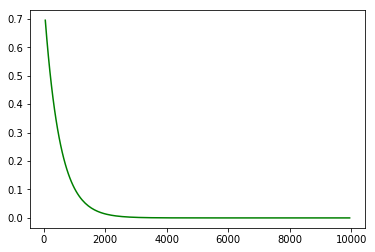

In [50]:
plt.plot(iters, loss_curve, 'g-')